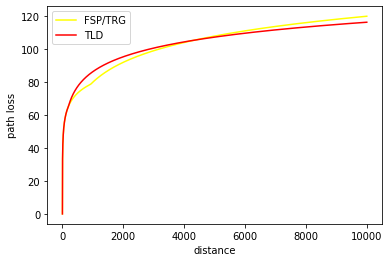

distance: 1000, FSP-TRG: 80.0 , TLD: 86.36670004336018
distance: 5000, FSP-TRG: 107.95880017344075 , TLD: 107.33580017344075
distance: 10.000, FSP-TRG: 120.0 , TLD: 116.36670004336018


In [106]:
#Task2

import numpy as np
from math import pi
from math import log10
import matplotlib.pyplot as plt

lmbd, ht, hr, distance, n, L0, dc = 1.35, 50, 2, [1, 200, 500], [2.0, 3.0, 3.0], 19.377, (4*pi*ht*hr)/lmbd
FSPTRG_pathloss_list, TLD_pathloss_list = np.zeros(10000), np.zeros(10000) 

def FSPTRG(d):
    if d <= dc: return 10*log10((d*4*pi/ lmbd)**2)  #FSP
    elif d > dc: return 10*log10((d*d/ (ht*hr))**2) #TRG
    else: return 0

def TLD(d):
    if d < distance[0]:
        return 0
    elif distance[0] <= d < distance[1]:
        return L0+ 10*n[0]*log10(d/ distance[0])
    elif distance[1] <= d < distance[2]:
        return L0+ 10*n[0]*log10(distance[1]/ distance[0])+ 10*n[1]*log10(d/ distance[1])
    else:
        return L0+ 10*n[0]*log10(distance[1]/ distance[0])+ 10*n[1]*log10(distance[2]/ distance[1])+ 10*n[2]*log10(d/ distance[2])

for i in range(1, 10000):
    FSPTRG_pathloss_list[i]= FSPTRG(i)
    TLD_pathloss_list[i]= TLD(i)

plt.ylabel('path loss')
plt.xlabel('distance')
plt.plot(FSPTRG_pathloss_list, color='yellow')
plt.plot(TLD_pathloss_list, color='red')
plt.legend(('FSP/TRG','TLD'))
plt.show()

print("distance: 1000, FSP-TRG: " + str(FSPTRG(1000)) + " , TLD: " + str(TLD(1000)))
print("distance: 5000, FSP-TRG: " + str(FSPTRG(5000)) + " , TLD: " + str(TLD(5000)))
print("distance: 10.000, FSP-TRG: " + str(FSPTRG(10000)) + " , TLD: " + str(TLD(10000)))



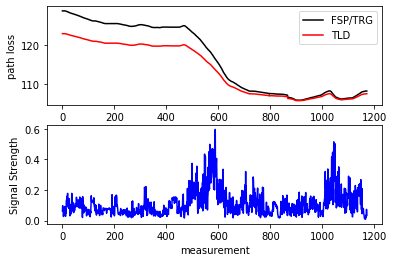

In [107]:
#Task3

import pandas as pd
import geopy.distance

coordinate = (50+ (42/ 60)+ (25.96/ 3600), 7+ (5/ 60)+ (49.13/ 3600))
titanic = pd.read_csv("ex1.csv")
signal = titanic.iloc[:, 3]
row, column = titanic.shape
FSPTRG_pathloss_list, TLD_pathloss_list = np.zeros(row), np.zeros(row)

    
def FSPTRG2(d):
    d = geopy.distance.distance(coordinate, (titanic.iloc[d, 1], titanic.iloc[d, 2])).meters
    if d <= dc: return 10*log10((d*4*pi/ lmbd)**2)
    elif d > dc: return 10*log10((d*d/ (ht*hr))**2)
    
def TLD2(d):
        d = geopy.distance.distance(coordinate, (titanic.iloc[d, 1], titanic.iloc[d, 2])).meters
        if d < distance[0]: return 0
        elif distance[0] <= d < distance[1]:
            return L0+ (10 * n[0] * log10(d / distance[0]))
        elif distance[1] <= d < distance[2]:
            return L0+ (10*n[0]*log10(distance[1]/ distance[0]))+ (10*n[1]*log10(d/ distance[1]))
        elif d >= distance[2]:
            return L0+ (10*n[0]*log10(distance[1]/ distance[0]))+ (10*n[1]*log10(distance[2]/ distance[1]))+ (10*n[1]*log10(d/ distance[2]))
        
for i in range(row):
    FSPTRG_pathloss_list[i]= FSPTRG2(i)
    TLD_pathloss_list[i]= TLD2(i)

plmeasure = plt.subplot(211)
plmeasure.set_ylabel('path loss')
plmeasure.set_xlabel('measurement')
plmeasure.plot(FSPTRG_pathloss_list, color='black')
plmeasure.plot(TLD_pathloss_list, color='red')
plmeasure.legend(('FSP/TRG','TLD'))

signalmeasure = plt.subplot(212)
signalmeasure.set_ylabel('Signal Strength')
signalmeasure.set_xlabel('measurement')
signalmeasure.plot(signal,color='blue')
plt.show()
